<a href="https://colab.research.google.com/github/ewaterland/Wi-Fi_Data_Pre-processing/blob/main/origina_data_pre_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* original 파일은 원본 파일을 의미합니다.
* org_temp 파일은 원본 파일의 불필요한 행을 제거 한 뒤 임의로 저장한 파일을 의미합니다.
* data 파일은 org_temp파일에서 이동 평균 필터를 적용한 파일을 의미합니다.
* sorted_data 파일은 이동평균필터가 적용된 데이터의 각 열의 값에 대한 평균을 낸 뒤, 값이 큰 순서대로 정렬했습니다.

## import

In [76]:
# 라이브러리 임포트
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ★ 데이터를 구별할 수 있는 **위치 정보, 데이터 수집 날짜, 버전** 입력 ★

In [77]:
temp = "8th"

In [78]:
date = "230916"

In [79]:
ver = "v005"

In [80]:
buffer = '5'

In [98]:
#sign = "/pos"
sign = "/neg"
#sign = ""

#sep = "/구간1"
sep = "/구간2"
#sep = ""

In [102]:
data = 0  # Offline

In [82]:
data = 1  # Online

## path

In [111]:
# Offline: 0 / Online: 1

data = 1

print("data: %d" % data)

path = "/content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/"
path_temp = path + date + " " + temp + "/"         # ex. 230703 MIPL/

if data == 0:
  offline_path = path_temp + "Offline Data/"
  path = offline_path
  data_type = "_offline"
elif data == 1:
  online_path = path_temp + "Online Data/"
  path = online_path
  data_type = "_online"

data: 1


# Moving Avg Filter

### 오리지널 데이터 셋에서 불필요한 열 제거
* BT, BY, BZ, Timestamp 열을 제거합니다.

In [112]:
# 데이터 파일 경로 설정
original_path = path + 'Original' + sign    # 원본 파일 경로
#temp_folder = temp_folder = path + 'Moving Avg Filter_BF ' + buffer + '/temp/'  # 중간과정을 저장할 폴더 경로
temp_folder = path + 'Moving Avg Filter_BF ' + buffer + sign + '/temp/'  # 중간과정을 저장할 폴더 경로

# output_folder 저장할 폴더가 없으면 생성
if not os.path.exists(temp_folder):
    os.makedirs(temp_folder)

# 폴더 안의 모든 파일에 대해 전처리 수행 및 저장
for file_name in os.listdir(original_path):
    # 파일 경로 생성
    file_path = os.path.join(original_path, file_name)

    # 파일 확장자 확인 : csv
    if file_path.endswith('.csv'):
        # 데이터 불러오기
        print("file_path: %s" % file_path)
        data = pd.read_csv(file_path)

        # 열 제거
        columns_to_drop = ['BT', 'BY', 'BZ', 'BX', 'Timestamp']
        data.drop(columns=columns_to_drop, inplace=True)

        # 열 삭제 조건 확인
        # mac 주소가 아닌 다른 값이 각 열의 첫번째 행에 위치한 경우 해당 열 삭제
        columns_to_drop = []
        for column in data.columns:
            first_value = data[column].iloc[0]
            if first_value <= -90:
                columns_to_drop.append(column)

        # 열 제거
        data.drop(columns=columns_to_drop, inplace=True)

        # 결과 파일 경로 생성
        temp_file_path = os.path.join(temp_folder, file_name)

        # 전처리된 데이터 저장
        data.to_csv(temp_file_path, index=False)

        print(f'{file_name} 전처리 완료. 저장 경로: {temp_file_path}')

file_path: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Original/neg/0.625,-34.2.csv
0.625,-34.2.csv 전처리 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/temp/0.625,-34.2.csv
file_path: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Original/neg/0.625,-30.8.csv
0.625,-30.8.csv 전처리 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/temp/0.625,-30.8.csv
file_path: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Original/neg/0.625,-22.csv
0.625,-22.csv 전처리 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/temp/0.625,-22.csv
file_path: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Original/neg/0.625,-36.5.csv
0.625,-36.5.csv 전처리 완료. 저장 경로: /content/drive/MyD

### 전처리가 완료된 데이터 셋에 대해 이동 평균 필터 적용

In [113]:
#temp_folder = temp_folder = path + 'Moving Avg Filter_BF ' + buffer + '/temp/'  # 중간과정을 저장할 폴더 경로
temp_folder = path + 'Moving Avg Filter_BF ' + buffer + sign + '/temp/'  # 중간과정을 저장할 폴더 경로
#filtered_folder = path + 'Moving Avg Filter_BF ' + buffer + '/Filtered Data/'    # 이동 평균 필터 데이터가 저장될 파일
filtered_folder = path + 'Moving Avg Filter_BF ' + buffer + sign + '/Filtered Data/'    # 이동 평균 필터 데이터가 저장될 파일

# 중간과정을 저장할 폴더가 없으면 생성
if not os.path.exists(filtered_folder):
    os.makedirs(filtered_folder)

#폴더 안의 모든 파일에 대해 전처리 수행 및 저장
for file_name in os.listdir(temp_folder):
    # 파일 경로 생성
    file_path = os.path.join(temp_folder, file_name)

    # 파일 확장자 확인 (예: csv 파일)
    if file_path.endswith('.csv'):
        # 데이터 불러오기
        print(file_path + " 진행 중...")
        data = pd.read_csv(file_path)

        # 이동 평균 필터 적용
        filtered_data = data.copy()
        for column in data.columns:
            filtered_data[column] = data[column].rolling(window=5, min_periods=1).mean()

        # 결과 파일 경로 생성
        filtered_file_path = os.path.join(filtered_folder, file_name)

        # 전처리된 데이터 저장
        filtered_data.to_csv(filtered_file_path, index=False)

        print(f'{file_name} 전처리 완료. 저장 경로: {filtered_file_path}')

/content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/temp/0.625,-34.2.csv 진행 중...
0.625,-34.2.csv 전처리 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Filtered Data/0.625,-34.2.csv
/content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/temp/0.625,-30.8.csv 진행 중...
0.625,-30.8.csv 전처리 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Filtered Data/0.625,-30.8.csv
/content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/temp/0.625,-22.csv 진행 중...
0.625,-22.csv 전처리 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Filtered Data/0.625,-22.csv
/content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Fil

### 오리지널데이터와 이동평균필터데이터 값 비교

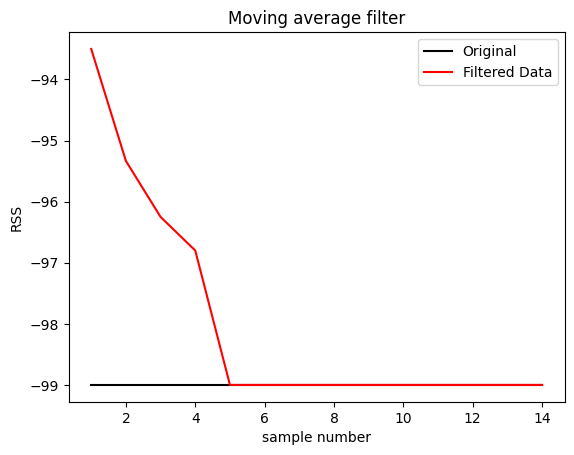

In [114]:
# 전처리 이후 temp 파일과 data 파일의 경로 설정
#temp_forder_path = temp_folder = path + 'Moving Avg Filter_BF ' + buffer + '/temp/'  # 중간과정을 저장할 폴더 경로
temp_forder_path = path + 'Moving Avg Filter_BF ' + buffer + sign + '/temp/'  # 중간과정을 저장할 폴더 경로

#filtered_forder_path = path + 'Moving Avg Filter_BF ' + buffer + '/Filtered Data/'    # 이동 평균 필터 데이터가 저장될 파일
filtered_forder_path = path + 'Moving Avg Filter_BF ' + buffer + sign + '/Filtered Data/'    # 이동 평균 필터 데이터가 저장될 파일

def read_first_csv_file():
    temp_files = os.listdir(temp_forder_path)
    temp_file_path = os.path.join(temp_forder_path, temp_files[0])
    temp_file = pd.read_csv(temp_file_path)

    files = os.listdir(filtered_forder_path)
    filtered_files = [file for file in files if file.endswith('.csv')]
    filtered_file_path = os.path.join(filtered_forder_path, filtered_files[0])
    filtered_file = pd.read_csv(filtered_file_path)

    compare(temp_file, filtered_file)

def compare(temp_file, filtered_file):
  column = 14 # 비교하고싶은 열

  # temp 파일에서 데이터 가져오기
  temp_data = temp_file
  temp_column = temp_data.iloc[1:, column]  # 해당 열, 두 번째 행부터의 값

  # filtered 파일에서 데이터 가져오기
  filtered_data = filtered_file
  filtered_column = filtered_data.iloc[1:, column]  # 해당 열, 두 번째 행부터의 값

  # 그래프 그리기
  plt.plot(temp_column, color='black', label='Original')
  plt.plot(filtered_column, color='red', label='Filtered Data')
  plt.xlabel('sample number')
  plt.ylabel('RSS')
  plt.title('Moving average filter')
  plt.legend()
  plt.show()

read_first_csv_file()

### 이동평균필터 데이터의 값을 각 열의 평균을 기준으로 높은 순 정렬

In [115]:
# 데이터 폴더 경로 설정
#filtered_forder_path = path + 'Moving Avg Filter_BF ' + buffer + '/Filtered Data/'    # 이동 평균 필터 데이터가 저장될 파일
filtered_forder_path = path + 'Moving Avg Filter_BF ' + buffer + sign + '/Filtered Data/'    # 이동 평균 필터 데이터가 저장될 파일
#sorted_folder_path = path + 'Moving Avg Filter_BF ' + buffer + '/Sorted Data/'  # 정렬된 데이터를 저장할 폴더 경로
sorted_folder_path = path + 'Moving Avg Filter_BF ' + buffer + sign + '/Sorted Data/'  # 정렬된 데이터를 저장할 폴더 경로

# 결과를 저장할 폴더가 없으면 생성
if not os.path.exists(sorted_folder_path):
    os.makedirs(sorted_folder_path)

# 폴더 안의 모든 파일에 대해 처리 수행
for file_name in os.listdir(filtered_forder_path):
    # 파일 경로 생성
    file_path = os.path.join(filtered_forder_path, file_name)

    # 파일 확장자 확인 (예: csv 파일)
    if file_path.endswith('.csv'):
        # 데이터 불러오기
        data = pd.read_csv(file_path)

        # 각 열의 평균값 계산
        mean_values = data.iloc[1:, :].mean(axis=0)

        # 평균값을 기준으로 열 정렬
        sorted_columns = mean_values.sort_values(ascending=False).index

        # 정렬된 열을 포함한 데이터프레임 생성
        sorted_data = data[sorted_columns]

        # 결과 파일 경로 생성
        output_file_path = os.path.join(sorted_folder_path, f'{file_name}')

        # 정렬된 데이터 저장
        sorted_data.to_csv(output_file_path, index=False)

        print(f'{file_name} 정렬 완료. 저장 경로: {output_file_path}')

0.625,-34.2.csv 정렬 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Sorted Data/0.625,-34.2.csv
0.625,-30.8.csv 정렬 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Sorted Data/0.625,-30.8.csv
0.625,-22.csv 정렬 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Sorted Data/0.625,-22.csv
0.625,-36.5.csv 정렬 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Sorted Data/0.625,-36.5.csv
0.625,-24.csv 정렬 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Sorted Data/0.625,-24.csv
0.625,-27.2.csv 정렬 완료. 저장 경로: /content/drive/MyDrive/2023_CD/[자료] Wi-Fi/Collected Data/230916 8th/Online Data/Moving Avg Filter_BF 5/neg/Sorted Data/0.625,-27.2.csv
0.625,-18.csv 정렬 완